<a href="https://colab.research.google.com/github/leonardo-melniski/colab/blob/main/imersaodados3_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão Dados
## 1 Análise de dados, python, pandas e novos fármacos
link: [alura.com.br/imersaodados3/aula01](
https://www.alura.com.br/imersao-dados/aula01-python-pandas-farmacologia?utm_campaign=imersao_dados_3_aulas_aula_1&utm_medium=email&utm_source=RD+Station)

Neste link, temos o Github do projeto onde está localizado a [base de dados](https://github.com/alura-cursos/imersaodados3).

Para dar um mergulho ainda mais profundo, dê uma olhada neste [artigo](https://www.alura.com.br/artigos/grafico-de-pizza?utm_source=gnarus&utm_medium=timeline) sobre o gráfico de pizza.

Esse projeto foi inspirado em um desafio do [Laboratory innovation science at Harvard](https://lish.harvard.edu/) disponibilizando os dados em uma competição no [kaggle](https://www.kaggle.com/c/lish-moa).

## Aula 01 - Parte 1


In [5]:
import pandas as pd

In [6]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

In [7]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [8]:
dados.shape

(23814, 877)

In [9]:
dados['tratamento']
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [10]:
dados['tempo'].unique()

array([24, 72, 48])

In [11]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [12]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [13]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [14]:
# frequencia dos dados da coluna tratamento
dados.value_counts(['tratamento'])

tratamento  
com_droga       21948
com_controle     1866
dtype: int64

### Desafio 01: Investigar pq a classe tratamento é tão desbalanceada?

In [15]:
# relação bivariada
x = pd.crosstab(dados['droga'], dados['tratamento'])
x[x['com_controle'] >= 1]

## experimento - com_controle recebeu label 'cacb2b860' na coluna 'droga'
## i.e. podemos ignorar a coluna tratamento em futuras comparações multi variadas com  col.'droga'

tratamento,com_controle,com_droga
droga,,
cacb2b860,1866,0


In [16]:
# tamanho dos ensaios do experimento por 'dose' e 'tempo'
dados.groupby(['dose', 'tempo', 'tratamento']).size()

dose  tempo  tratamento  
D1    24     com_controle     301
             com_droga       3585
      48     com_controle     343
             com_droga       4011
      72     com_controle     307
             com_droga       3600
D2    24     com_controle     305
             com_droga       3581
      48     com_controle     305
             com_droga       3591
      72     com_controle     305
             com_droga       3580
dtype: int64

In [17]:
df_d1_24 = dados[(dados['dose'] == 'D1') & (dados['tempo'] == 24)]
df_d1_24.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.3015,-0.9578,0.5354,1.1360,1.1310,...,0.6701,2.0780,1.3350,0.9889,0.5017,2.0020,0.8918,0.4290,0.0716,0.8465,0.6596,1.3710,1.0580,1.7570,1.0030,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990
36,id_00762e877,com_droga,24,D1,0c3e1a7e3,-0.4026,0.1662,-0.6307,-0.4438,-0.5992,-0.2523,-1.3770,-0.7637,-1.4880,-0.1970,-0.5229,0.2942,-0.6387,-1.0830,0.2464,0.6330,0.2837,0.0104,-0.0121,-0.1858,-0.6253,0.5023,0.4164,-0.4699,0.3135,-0.2699,0.6885,0.2043,-0.1817,-0.8334,0.7470,0.3260,0.0979,0.3905,-1.2800,...,-0.1907,-1.1300,0.6586,0.5898,-0.5857,0.7819,0.0693,-0.3232,0.6517,-0.3393,-0.4067,0.6806,0.3383,0.6075,-0.1051,0.3936,-0.2994,0.5334,0.3730,0.3277,-1.7540,-0.2032,-0.2044,0.7913,-0.0901,-0.6183,-0.0817,0.5161,-0.2544,0.5790,-0.6357,-0.1639,-0.0852,0.1438,0.0083,0.7504,0.5418,0.8407,0.3193,0.4817
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
39,id_0079d45d3,com_droga,24,D1,292ab2c28,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,-2.2040,-0.8888,-1.1730,0.0444,-3.9430,0.1673,-0.9502,-1.1750,0.1686,3.8480,-2.9760,-0.0389,1.6330,-0.0655,1.3810,-2.4340,-1.8040,0.3945,-1.2080,-0.1963,-2.0170,0.6004,-2.5860,-1.4550,-0.4141,...,-1.8210,-1.2440,-2.5430,-6.4260,-2.5320,-4.3570,-4.7560,-0.8781,-3.7800,-1.6340,-3.9660,-1.7890,-3.2480,-2.6720,-1.3250,-2.3430,-3.2220,-2.5160,-2.3410,-2.4620,-3.8760,-2.2450,-3.9450,-1.7400,-4.4320,-3.6740,-2.9810,-4.5770,-1.8620,-1.9120,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461


### Desafio 02: Plotar as 5 últimas linhas da tabela
#### 02.1: últimas 10 linhas


In [18]:
dados.tail(n = 10)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23804,id_fff506720,com_droga,24,D1,74515bfd2,-1.0140,0.1709,-0.4291,1.8750,0.9859,0.3009,0.0650,-1.3920,-1.0410,1.4790,-0.4459,0.7377,-0.0037,-0.0995,-0.2393,-1.1670,-0.9359,1.1260,0.3450,-1.0780,2.7230,0.5255,0.6368,0.0000,-0.1172,0.8256,0.2120,2.1500,0.5925,-0.7637,0.1157,0.0919,-0.5855,-0.6233,-0.7982,...,-1.1130,0.6549,-1.0250,-2.6910,-0.6001,-1.3260,-1.5960,-0.3137,-0.4209,-0.9542,-1.4760,-1.0180,-1.1360,0.1523,-1.0130,-0.4065,0.8502,-0.0978,-0.7339,-0.5680,-0.5700,0.7834,-2.5930,-2.1570,-0.7917,-0.9154,1.5140,-3.1070,-0.2346,-0.2662,-0.6730,0.3175,-1.5510,-1.2800,-0.7632,-0.6736,-0.4097,0.2282,-0.3213,-0.0836
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,-0.2392,-0.1774,-1.3980,-0.4059,0.1553,0.1083,-0.8020,-0.5039,-0.7167,-0.5016,-0.9369,-0.5864,-0.1009,0.8987,0.3389,-1.3460,-0.5087,-0.0892,-0.6559,0.0864,-0.6251,0.2471,-0.4523,-0.0389,1.0340,0.0796,-0.2560,-0.7851,-0.1687,-1.2890,...,0.2866,0.3854,-0.4986,0.2883,0.5843,0.0907,-0.9303,0.1981,0.6515,0.2877,0.4389,-0.3859,0.5203,-1.1070,2.3870,0.1820,-0.6434,-0.9722,-0.4200,-0.5693,1.0700,1.1110,-0.5117,-1.2130,0.3769,0.5296,1.0400,0.0587,1.0150,-0.7669,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23806,id_fff790a17,com_droga,48,D2,47dd8f190,-0.1150,-0.8037,0.0988,-0.1301,0.2013,0.9126,0.2234,0.8321,0.0486,-0.4505,0.3666,-0.0418,0.5645,0.4406,0.5708,-0.0984,1.2150,-0.0770,0.4057,0.7522,-0.3141,-0.2469,-0.5490,-0.1521,0.5957,-0.0912,0.4107,-0.0944,-0.1861,0.5627,-0.0437,-0.5673,0.2384,0.5478,0.3555,...,0.1608,-0.2668,0.8981,-0.5505,0.5671,0.2905,0.8563,-0.4375,0.3678,0.3119,0.4316,-0.6997,0.5957,0.1860,0.3508,0.2853,1.0110,0.0014,-0.2718,-0.1950,1.0390,-0.3072,0.8025,-0.1202,-1.0380,0.9099,0.2493,-0.7423,0.3864,1.2630,0.2358,0.1086,-0.1686,-0.3482,0.4121,0.5728,1.2630,0.7823,-0.6947,0.7277
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.5554,0.2225,-0.0903,0.9227,-0.0460,0.3756,1.0730,-0.6904,0.9298,1.0500,0.4646,0.4481,0.9771,0.7187,0.5299,0.1079,1.2010,0.2529,-0.4546,0.7998,0.6401,-1.3370,0.6542,0.8561,0.4829,0.3213,-0.0177,-0.2656,0.4626,0.0030,0.8775,0.5230,0.1589,0.7715,0.5497,0.6929,0.3738,0.8636,0.4494,0.1218
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.2723,-0.3629,1.0820,...,-0.2720,-0.6021,0.2451,0.6607,-0.1849,-0.6546,-0.5798,0.3449,-0.6208,0.2949,0.4158,0.8586,0.3868,1.0030,-0.4593,0.6498,0.8293,-0.7645,0.5379,0.5610,0.2577,-0.5493,0.2690,0.6392,-0.5774,-0.3393,0.5068,-0.2005,-0.4559,0.3734,0.0789,0.3538,0.0558,0.3377,-0.4753,-0.2504,-0.7415,0.8413,-0.4259,0.2434
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,

### Desafio 03: Proporção das classes de tratamento.


In [19]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

### Desafio 04: Quantos tipos de drogas foram investigadas.

In [20]:
dados['droga'].unique().size

3289

#### Desafio 04.1 - quantos experimentos por droga

In [21]:
dados.groupby(['droga']).size().value_counts()

# set_drogas = dados.groupby(['droga']).size()[dados.groupby(['droga']).size() < 200].index

# dados[dados['droga'].isin(set_drogas)][['tratamento', 'tempo', 'dose', 'droga']]


6       2774
7        196
1        129
5         66
12        64
13        25
14         6
11         4
8          4
2          3
4          3
18         3
3          2
178        1
203        1
186        1
194        1
196        1
19         1
246        1
718        1
1866       1
202        1
dtype: int64

## Aula 01 - Parte 02

In [22]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

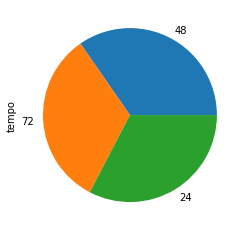

In [23]:
dados['tempo'].value_counts().plot.pie()

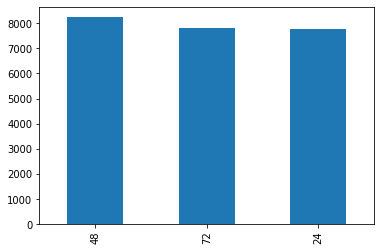

In [24]:
dados['tempo'].value_counts().plot.bar()

In [25]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


### Desafio 5: Procurar na documentação o método query (pandas).

In [26]:
dados.query('`g-0` > `g-1` and `g-1` > `g-2`').head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
11,id_0024bcd70,com_droga,48,D2,b877aa048,-0.3864,-0.5551,-0.8978,-0.2616,-0.2801,-0.7128,-0.2960,-0.1811,0.4521,1.6000,-0.2325,0.2750,-0.3063,0.4162,0.4514,-0.1926,-0.3090,0.2198,-0.5743,-0.3183,-0.4053,-0.5434,0.4164,0.0000,0.5475,0.3858,0.0109,-0.4169,0.2151,0.3453,-0.7071,-0.0849,-0.2968,0.1824,0.8732,...,-0.0314,-0.5320,0.0589,0.8906,0.6207,0.0469,0.3254,0.0787,0.2399,0.3990,0.1501,0.4105,0.3239,-0.5079,-0.7841,0.2495,-0.0202,0.7055,0.3081,0.2200,-0.5511,-0.1174,0.2932,0.6291,-0.9436,-1.0680,0.5833,-0.0413,0.1107,0.6545,0.2856,-0.1953,0.7269,-0.5909,-0.0241,0.0299,0.2731,0.6306,0.8285,0.3605
18,id_003603254,com_droga,72,D2,3cda750b5,-0.4694,-1.5180,-2.0430,0.5750,0.5077,0.2880,-0.3198,-0.6101,0.1249,0.4362,-0.6237,0.5495,-1.3170,-1.1880,-1.1790,0.5008,-0.0821,0.1371,-0.2100,0.1626,1.4410,-0.4535,0.4796,0.5551,-1.4560,-0.2305,-0.7454,0.6339,-0.1980,-0.7012,-0.0882,-0.7792,-1.3130,0.9740,0.6500,...,-0.2869,-0.8081,0.7787,-2.3180,-0.1749,-1.5440,-0.2516,0.0398,-1.0300,-1.2490,-1.4980,0.6580,-1.2280,-0.3264,-0.4176,0.4094,-1.1720,-1.5150,0.7748,0.1379,-0.9742,-0.4860,-1.8320,-0.2079,-1.5640,0.0375,-1.0310,1.0830,-1.5510,-0.5745,-1.4650,-0.3515,-0.3931,-0.5623,-1.0300,-1.3360,-1.3790,-0.4393,-0.0259,0.9765
19,id_0036b0342,com_droga,48,D1,d14919a0e,-0.1428,-0.1957,-0.6397,0.0726,-0.8058,1.0030,0.4961,0.1661,0.1585,-0.1017,-0.6012,0.2375,0.6891,1.0230,0.1307,-0.0348,-0.0599,-0.8773,0.6515,0.1524,0.3350,-0.4348,-0.5091,-0.4875,0.3864,0.6467,-0.1579,-0.6164,0.8317,0.6261,-0.0525,0.4118,0.5612,-0.1622,0.3007,...,-0.4549,0.1426,0.3224,0.5182,-0.2108,-0.4321,0.7119,0.4460,-0.1447,0.3731,0.3752,-0.0814,0.4946,-0.2430,0.4539,-0.7639,-0.1048,1.1200,0.5435,0.3051,-0.0986,0.2992,-0.1557,0.3361,-0.3646,0.7881,-0.4541,0.5163,0.7364,-0.3632,-0.1851,-0.1995,0.3496,0.3608,0.7261,-0.0030,0.2853,0.3129,0.4251,0.4308


In [27]:
custom_cmp = lambda x, y: '`g-{}` > `g-{}`'.format(x, y)
query = ' and '.join(map(custom_cmp, range(5), range(1, 6)))
print('query = {}'.format(query))
dados.query(query).head()

query = `g-0` > `g-1` and `g-1` > `g-2` and `g-2` > `g-3` and `g-3` > `g-4` and `g-4` > `g-5`


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
857,id_08a9df853,com_droga,48,D1,262da47c0,2.1370,0.9874,0.8352,-0.1140,-0.2896,-2.224,-0.1310,0.1331,0.6088,2.4150,0.4595,-0.6894,0.8424,1.4940,1.1990,0.1916,-1.5800,1.8560,0.4438,0.3779,-1.1260,-0.3248,1.1800,-0.1221,-0.6473,0.7097,0.0355,-0.2417,0.2556,-0.0280,0.2260,-0.0837,-4.2930,-0.5655,0.1561,...,-0.2564,-0.5512,-1.0630,-0.2676,0.1783,0.2123,-0.4390,-0.5301,-0.0579,1.2700,0.0205,-0.2345,-0.0305,0.6190,-0.0150,-0.6213,-0.2921,-0.3737,-1.2350,0.3021,-0.7832,-0.1642,-0.3439,-0.2823,-0.4583,-0.5461,0.0825,-0.1178,0.1792,-0.4383,-0.6636,0.0159,-0.9761,-0.2804,-0.9941,-1.3320,0.2735,-0.0270,-0.9156,-0.2829
1518,id_103317914,com_droga,24,D1,00321ea80,-0.1156,-0.4923,-0.5274,-0.6043,-1.1520,-2.859,0.0651,0.8228,0.7025,-0.1881,1.7700,-0.8884,1.6020,-0.4110,-0.7002,-0.0997,-1.5130,-0.2553,0.1066,0.3360,-0.5497,-0.0067,-0.7577,0.2826,-0.1390,0.1120,-0.4424,0.4938,-0.1619,-0.6270,-0.6497,-0.5204,0.0712,5.0000,0.0266,...,1.3600,-0.3677,0.5125,0.6440,0.7195,0.8331,0.7629,0.1368,0.5904,-0.0465,0.4354,1.3660,0.4243,1.2040,-0.2528,-1.2850,0.0771,0.1484,-0.2250,1.1580,-0.3166,-0.0643,0.9463,-0.1822,1.0280,0.0852,1.2700,0.1992,1.1080,0.8193,0.8328,0.5680,0.1268,1.0960,1.4270,0.4209,0.3227,0.8924,0.2244,0.5785
1599,id_1106d898d,com_droga,48,D1,bce9dc5c8,1.0790,0.5159,-0.0969,-0.6255,-0.7203,-2.145,-3.1550,-1.6640,2.9620,-2.2220,-2.6290,-2.1320,-1.5990,1.4800,-0.6379,-1.3980,-2.5180,-1.6120,-0.2091,0.5001,-1.2630,-1.4460,-0.1937,3.4330,-1.0920,1.0150,-2.2860,-1.1920,-0.2749,-2.0340,-3.7050,1.7590,-5.4870,7.5930,-2.6340,...,-9.2030,-4.0260,-4.4830,-8.2670,-4.2940,-9.6820,-3.5890,-3.1810,-2.7530,-1.2570,-0.7796,-1.2590,-3.6860,-4.9220,-1.5480,-9.3220,-4.2800,-3.0480,-0.0579,-1.3200,-7.3100,-4.8490,-2.2280,-1.9440,-7.5610,-1.8850,-6.1280,0.2223,-5.2530,-1.5040,-3.9660,-6.8140,-5.2500,-7.4510,-6.8440,-2.0850,-4.2970,-1.9390,-5.8430,-3.8400
1857,id_14188fcfe,com_droga,24,D1,1f4fc34c5,1.9840,0.7341,0.4142,-1.0520,-1.6340,-2.969,3.5170,1.8030,-1.4410,-3.2300,3.3380,1.3490,-2.0680,-0.8469,2.3660,1.6100,0.3638,-5.8180,0.1235,0.7090,4.1550,0.8915,-1.4510,-2.2070,-2.5580,1.6340,1.9340,-2.1100,-0.6105,1.8760,2.5160,0.0654,0.9362,3.1050,1.4890,...,0.4301,0.1256,-0.9150,-0.1875,-0.9384,0.1298,-0.9929,-1.7200,0.4413,0.8085,0.0535,-0.7179,0.2045,-0.7776,-0.1325,-0.0943,-0.0396,0.3713,0.2776,-0.4445,-0.5914,-0.3147,0.3708,-0.0545,-0.3082,-0.2107,0.1655,-1.5810,0.3946,-1.1540,-1.5410,-0.6355,-0.6270,-1.7590,0.3223,-0.6287,-0.3431,-0.2995,-0.0477,0.3979
2309,id_18b623be6,com_droga,24,D1,4a75f1d42,1.1400,1.1360,1.0680,0.5418,-0.2376,-0.404,0.2368,0.2821,1.4240,2.6410,0.7564,-0.0607,1.7840,-0.8255,0.9151,-1.0850,-0.2531,0.7998,-0.8117,0.2991,-0.7564,1.0140,0.3209,1.7590,-0.4906,-0.4622,0.4539,0.8064,0.1438,0.2077,0.0641,-0.0442,-0.6896,-0.1088,-0.5470,...,-0.1809,0.0095,-0.0324,0.3509,0.1672,-0.7792,-0.0082,0.9969,-0.3537,-0.4692,-0.4420,-0.3025,-0.8391,-0.1345,-0.6748,-1.2950,0.1304,0.3443,-0.7444,-0.3683,-0.4917,-0.1364,-0.4161,-0.1041,0.2153,0.5247,0.8181,-0.2965,-0.5027,-0.5854,0.1914,-0.7458,-0.1296,1.1160,0.4174,0.8688,-0.1563,0.6033,0.0684,-0.8127


### Desafio 6: Renomear colunas tirando o hífen.

In [28]:
dados.columns = dados.columns.str.replace('-', '')
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Desafio 7: Customizar o gráfico (titulo, label, etc..).



In [119]:
dados_plot = dados.groupby(['dose', 'tempo'], as_index=False)['tratamento'].count() 
dados_plot.head()

dose,D1,D2
tempo,,
24,3886,3886
48,4354,3896
72,3907,3885


In [ ]:
dados_plot_pivot = dados_plot.pivot(index='tempo', columns='dose', values='tratamento')
dados_plot_pivot.head()

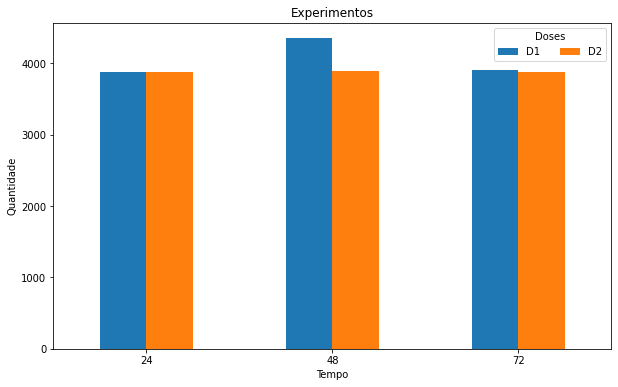

In [120]:
import matplotlib.pyplot as plt

dados_plot_pivot.plot.bar(
    figsize=(10, 6)
)
plt.title('Experimentos')
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0, horizontalalignment="center")
plt.legend(ncol=2, title='Doses')
